In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
import joblib

In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df.shape

(418, 12)

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df = df.fillna(value = df['Age'].mean())

In [ ]:
# df=df.drop('PassengerId', axis = 'columns')
df=df.drop('Cabin', axis = 'columns')

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Name"] = le.fit_transform(df["Name"])
df["Sex"] = le.fit_transform(df["Sex"])
df["Ticket"] = le.fit_transform(df["Ticket"])
df["Embarked"] = le.fit_transform(df["Embarked"])
#df["Cabin"] = le.fit_transform(df["Cabin"])

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name             int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket           int64
Fare           float64
Embarked         int64
dtype: object

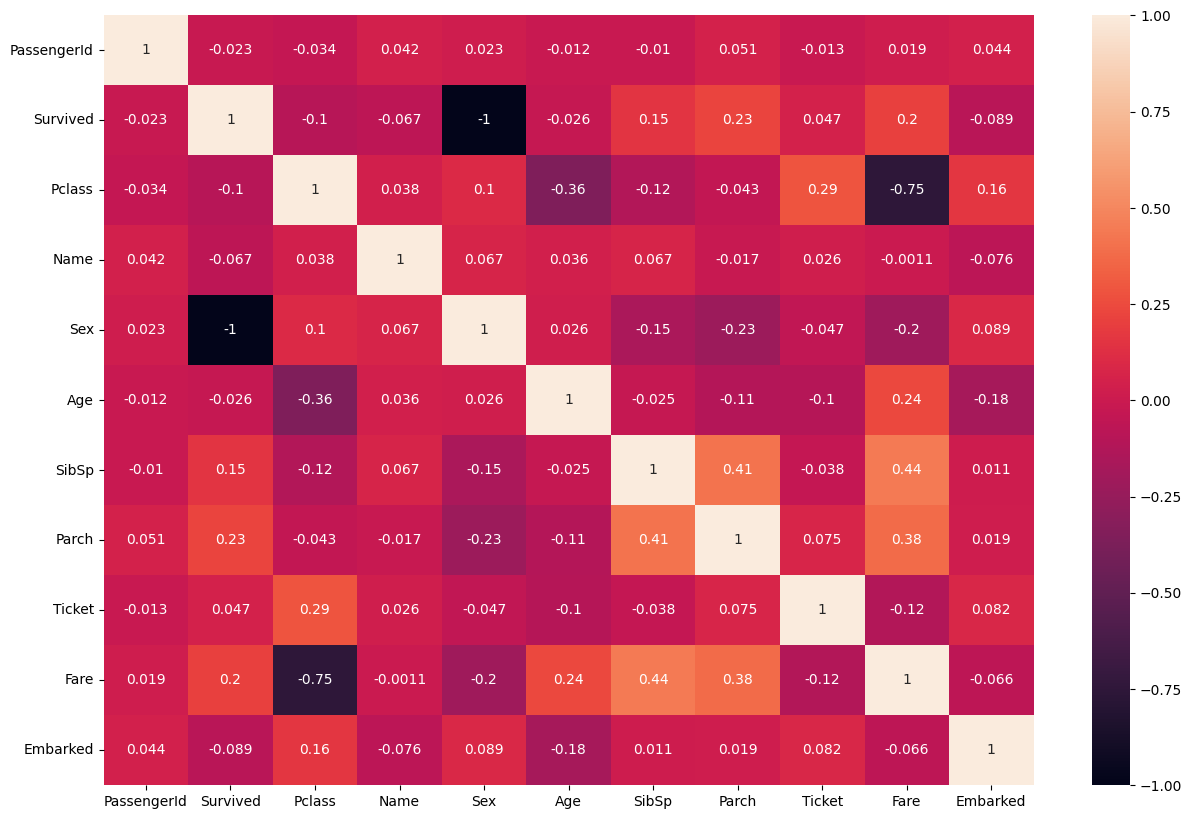

In [ ]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(15,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

<Axes: xlabel='Survived', ylabel='count'>

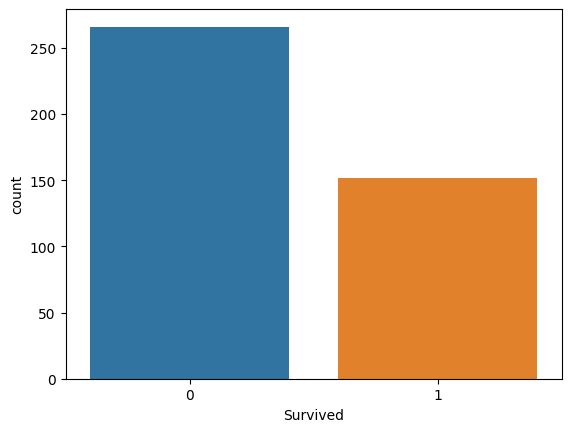

In [ ]:
sns.countplot(data=df, x='Survived')

In [ ]:
X = df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
y = df['Survived']

In [ ]:
from imblearn.over_sampling import RandomOverSampler
rs = RandomOverSampler(random_state=0)
X_res, y_res = rs.fit_resample(X, y)
print('original dataset shape %s' %Counter(y))
print('After oversampling dataset shape %s' %Counter(y_res))


original dataset shape Counter({0: 266, 1: 152})
After oversampling dataset shape Counter({0: 266, 1: 266})


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=11)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(425, 7) (425,)
(107, 7) (107,)


In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred2 = model.predict(x_test)
print(pred2)

[1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1
 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0
 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1]


[]

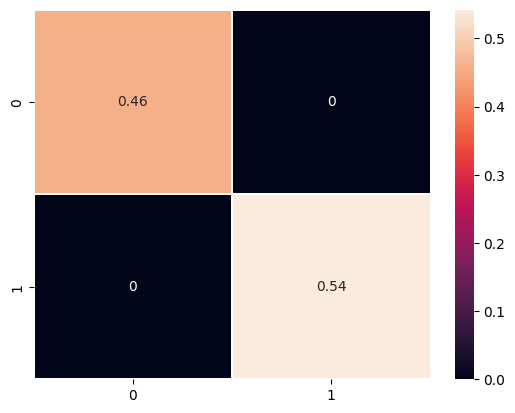

In [ ]:
score = accuracy_score(y_test, pred2)
cn = confusion_matrix(y_test, pred2)
ax = plt.subplot()
sns.heatmap(cn / np.sum(cn), annot = True, linewidths=.15, ax=ax)
plt.plot()

In [ ]:
test_data_accuracy = accuracy_score(y_test, pred2)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  1.0


In [ ]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        58

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107



Accuracy: 1.0


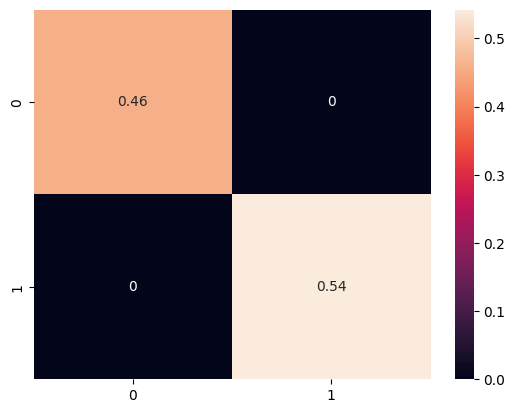

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)
pred = model.predict(x_test)
score = accuracy_score(y_test, pred)
cn = confusion_matrix(y_test, pred)
ax = plt.subplot()
sns.heatmap(cn / np.sum(cn), annot = True, ax=ax)
plt.plot()
print('Accuracy:',score)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        58

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107

